# **Mount implementation folder in google drive**

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
%cd /content/drive/MyDrive/FYP/Implementation/data
! ls

/content/drive/.shortcut-targets-by-id/1MkC_V0CRXkQ-OsCBxF38m1Sku4w4s3TR/FYP/Implementation/data
encoded-data.csv	 preprosessing-dos.csv	       UNSW-NB15_1.csv
high_level_features.csv  selected_columns_all.csv      UNSW-NB15_2.csv
NUSW-NB15_features.csv	 SVR-predict-data.csv	       UNSW-NB15_3.csv
OTset.csv		 test_high_level_features.csv  UNSW-NB15_4.csv
preprocessing.csv	 testset.csv


In [3]:
import pandas as pd
%cd /content/drive/MyDrive/FYP/Implementation/data
high_level_features=pd.read_csv("high_level_features.csv", sep=',', on_bad_lines='skip', index_col=False)
high_level_features

/content/drive/.shortcut-targets-by-id/1MkC_V0CRXkQ-OsCBxF38m1Sku4w4s3TR/FYP/Implementation/data


,Analysis_metric,Backdoors_metric,DoS_metric,Exploits_metric,Fuzzers_metric,Generic_metric,Reconnaissance_metric,Shellcode_metric,Worms_metric
0,0.285714,1.000000,0.18576,0.0,0.031250,0.000,0.000000,0.0,0.000000
1,0.285714,1.000000,0.18576,0.0,0.031250,0.000,0.000000,0.0,0.000000
2,0.285714,0.036126,0.18576,0.0,0.031250,0.000,0.000000,1.0,0.000000
3,0.500000,1.000000,0.18576,0.0,0.083333,1.000,0.000000,0.0,0.727273
4,0.285714,1.000000,0.18576,0.0,0.031250,0.000,0.000000,0.0,0.000000
...,...,...,...,...,...,...,...,...,...
1524019,0.500000,1.000000,0.18576,0.0,0.083333,1.000,0.333333,0.0,0.454545
1524020,0.285714,0.036126,0.18576,0.0,0.031250,0.000,0.000000,0.0,0.181818
1524021,0.285714,0.036126,0.18576,1.0,0.154487,0.375,1.000000,1.0,1.000000
1524022,0.285714,1.000000,0.18576,0.0,0.031250,0.000,0.000000,0.0,0.000000


##**Logistic Regression**

In [4]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
from joblib import Parallel, delayed
import joblib
from sklearn import linear_model
from sklearn.svm import SVR
from sklearn.ensemble import BaggingRegressor
from sklearn.datasets import make_regression

#create training dataset 
df = pd.read_csv('encoded-data.csv', sep=',', on_bad_lines='skip', index_col=False)

high_level_features=pd.read_csv("high_level_features.csv", sep=',', on_bad_lines='skip', index_col=False)
x= np.array(high_level_features)
y = np.array(df['Label'])
print(x.shape,y.shape)
regr = BaggingRegressor(base_estimator=linear_model.LogisticRegression(random_state=0), n_estimators=10, random_state=0).fit(x, y)

# Save the model as a pickle in a file
%cd /content/drive/MyDrive/FYP/Implementation/models
joblib.dump(regr, 'bagging_lr.pkl')

(1524024, 9) (1524024,)
/content/drive/.shortcut-targets-by-id/1MkC_V0CRXkQ-OsCBxF38m1Sku4w4s3TR/FYP/Implementation/models


['bagging_lr.pkl']

## **Computing optimal threshold**

/content/drive/.shortcut-targets-by-id/1MkC_V0CRXkQ-OsCBxF38m1Sku4w4s3TR/FYP/Implementation/models
maximum_train_f1_score: 0.9467551061554599, accuracy: 0.9863105830354377, optimal_threshold:  0.200000


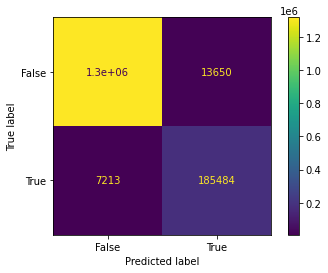

In [5]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
from joblib import Parallel, delayed
import joblib

%cd /content/drive/MyDrive/FYP/Implementation/models
# Load the model from the file
logr = joblib.load('bagging_lr.pkl')

#getting probabilities of class 1
prob=logr.predict(x)

optimal_threshold = 0
maximum_f1 = 0

for i in range(1,100):
  threshold = i/100
  y_predict_class_train = [1 if p > threshold else 0 for p in prob]
  f1 = f1_score(y, y_predict_class_train)
  if maximum_f1 < f1:
    maximum_f1 = f1
    optimal_threshold = threshold
    opt_y_train = y_predict_class_train 

accuracy = accuracy_score(y, opt_y_train)
print(f"maximum_train_f1_score: {maximum_f1}, accuracy: {accuracy}, optimal_threshold: {optimal_threshold: .6f}")
confusion_matrix = metrics.confusion_matrix(y, opt_y_train)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

# **Test Set Results**

/content/drive/MyDrive/FYP/Implementation/data
(508006, 9)
(508006,)
/content/drive/MyDrive/FYP/Implementation/models
maximum_train_f1_score: 0.5496741862294983, accuracy: 0.8839600319681263, optimal_threshold:  0.200000


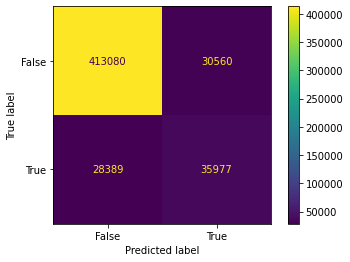

In [ ]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
from joblib import Parallel, delayed
import joblib


%cd /content/drive/MyDrive/FYP/Implementation/data
test_high_level_features=pd.read_csv("test_high_level_features.csv", sep=',', on_bad_lines='skip', index_col=False)
test_high_level_features.dropna()

#delete raws with missing values
for i in test_high_level_features.columns.values.tolist():
  i = test_high_level_features.loc[test_high_level_features[i].isnull()].index
  test_high_level_features = test_high_level_features.drop(index=list(i))

x_test= np.array(test_high_level_features.drop(labels=['Label'], axis=1))
y_test = np.array(test_high_level_features['Label'])
print(x_test.shape)
print(y_test.shape)

%cd /content/drive/MyDrive/FYP/Implementation/models
# Load the model from the file
logr = joblib.load('bagging_lr.pkl')

#getting probabilities of class 1
prob=logr.predict(x_test)

optimal_threshold = 0
maximum_f1 = 0

for i in range(1,100):
  threshold = i/100
  y_predict_class_train = [1 if p > threshold else 0 for p in prob]
  f1 = f1_score(y_test, y_predict_class_train)
  if maximum_f1 < f1:
    maximum_f1 = f1
    optimal_threshold = threshold
    opt_y_train = y_predict_class_train 

accuracy = accuracy_score(y_test, opt_y_train)
print(f"maximum_train_f1_score: {maximum_f1}, accuracy: {accuracy}, optimal_threshold: {optimal_threshold: .6f}")
confusion_matrix = metrics.confusion_matrix(y_test, opt_y_train)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

In [ ]:
np.any(np.isnan(y_test))

True

In [ ]:
np.any(np.isnan(y_predict_class_train))

False

In [ ]:
np.all(np.isfinite(y_test))

False

In [ ]:
np.all(np.isfinite(y_predict_class_train))

True